# Übung zur Sentimentanalyse - Analyse von Twitter Daten

## Aufgabe 1: Theorie

### 1.1: Wozu dient das Package TextBlog von Python und wie wird es angewendet?

Mit Hilfe des TextBlog Packages, lassen sich sehr einfach Textanalysen durchführen. <br> TextBlob misst die Polarität eines Strings: <br> $Polarität > 0 =    +(positiv) $<br> und<br>  $ Polarität < 0   =   - (negativ) $ <br>
Die Anwendung erfolgt über den Import:
```python
from textblob import TextBlob
```
Die Analysesyntaxt sieht wie folgt aus:
```python
TextBlob(String).sentiment
```

### 1.2 Frage: Wie muss der Text vorbereitet werden, um den TextBlob Classifier anwenden  zu können?

Zuerst müssen<br>

* Symbole 
* Hyperlinks
* Satzzeichen
* @mentions

entfernt werden <br>
Ausserdem muss der Text Tokenisiert werden.


# Aufgabe 2: Übung Twitter Data mining
## In dieser Übung sollen alle Tweets mit dem Tag "dataScience" gesammelt werden.
Für die folgende Übung benötigen wir zunächst einen API Key von Twitter.
Diesen bekommt man unter [apps.twitter.com](https://apps.twitter.com/)

### 2.1 Die Zugangsdaten sollen in einem Python Modul *credentials.py* abgespeichert werden.
Dieses könnte folgendermaßen aussehen.
```python
# Consume:
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''

# Access:
ACCESS_TOKEN  = ''
ACCESS_SECRET = ''
```

### 2.2 Anschließend benötigen wir Imports für die folgenden Packages:
* tweepy
* pandas
* numpy
* credentials
* TextBlob
* re

Für die Visualisierung benötigen wir zusätzlich
* Ipython.display
* matplotlib
* seaborn

In [77]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from credentials import *

### 2.3 Nun wollen wir in einem das API Setup und die Authentication mit Hilfe unseres API Keys aufsetzen
Hier sollen nun mit Hilfe des credentials Modules die Authemtication und somit de API Verbindung hergestellt werden.<br>
Hilfe beim Setup bietet unter anderem dieses [Tutorial](https://www.sitepoint.com/how-to-create-a-twitter-app-and-api-interface-via-python/)

In [78]:
# We import our access keys:
from credentials import *# This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

### 2.3 Als nächstes wollen wir ein Objekt erstellen über welches wir Twitter abfragen tätigen können
Die Methode um nach einfachen Tags zu suchen lautet folgendermaßen : 
``` python
search(q= "SearchTag")
```
Anschließend sollen die gesammelten Tweets ausgegeben werden.

In [79]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets =extractor.search(q = "dataScience")
#tweets = extractor.user_timeline(screen_name="DeepLearning", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 15.

5 recent tweets:

RT @anthonyawasom: The #DataScience #ecosystem: Industrial Edition {Infographic}: https://t.co/EzC77x4ju0 

#ML #AI #BigData #Analytics #Cy…

RT Talent_metrics "RT Rbloggers: Interactive RTutor Problemsets via RStudio Cloud https://t.co/69IVkyoo0y #rstats #DataScience"

RT @ams_ds: Seen our 28 JUNE program? #DataScience #ArtificialIntelligence pitches from @scitodate @CodersCo @frosha_io @BloomAmsterdam @fl…

RT @HakunaMaDatacom: The Mobile #Growth #Statistics Marketers Can't Afford to Ignore
https://t.co/uRbX1eE35o #DataScience #GrowthHacking #G…

RT @IainLJBrown: India's Largest Data Science Event – Data Science Congress 2018 Successfully Concludes On a High Note

Read more here: htt…



### 2.4 Um die Tweets zu analysieren sollen diese nun in einen DataFrame gespeichert werden

In [80]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @anthonyawasom: The #DataScience #ecosystem...
1,"RT Talent_metrics ""RT Rbloggers: Interactive R..."
2,RT @ams_ds: Seen our 28 JUNE program? #DataSci...
3,RT @HakunaMaDatacom: The Mobile #Growth #Stati...
4,RT @IainLJBrown: India's Largest Data Science ...
5,RT @MangoTheCat: NEW ON THE BLOG: Our Chief Da...
6,RT @IainLJBrown: 2018 Data Governance &amp; In...
7,RT @DeepLearn007: MIT: Revolutionizing Everyda...
8,@FIFAWorldCup prize pool will be $790 million:...
9,RT @jblefevre60: The #CIO's Guide to #QuantumC...


### 2.5 Um zu sehen wie ein abgespeicherter Tweet aufgebaut ist, lassen wir uns folgende Attribute des 1. Tweets ausgeben:
* id
* created_at
* source
* favorite_count
* retweet_count
* geo
* coordinates
* entities

In [81]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1003593033630167040
2018-06-04 11:03:19
Twitter for Android
0
6
None
None
{'hashtags': [{'text': 'DataScience', 'indices': [23, 35]}, {'text': 'ecosystem', 'indices': [36, 46]}, {'text': 'ML', 'indices': [108, 111]}, {'text': 'AI', 'indices': [112, 115]}, {'text': 'BigData', 'indices': [116, 124]}, {'text': 'Analytics', 'indices': [125, 135]}], 'symbols': [], 'user_mentions': [{'screen_name': 'anthonyawasom', 'name': 'Anthony Awasom', 'id': 2750656221, 'id_str': '2750656221', 'indices': [3, 17]}], 'urls': [{'url': 'https://t.co/EzC77x4ju0', 'expanded_url': 'http://bit.ly/2Jdq9qH', 'display_url': 'bit.ly/2Jdq9qH', 'indices': [82, 105]}]}


### 2.6 Nun wollen wir unserem Dataframe die Attribute Länge des Textex, ID, Date, Source, Likes und Retweets hinzufügen

In [82]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [83]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @anthonyawasom: The #DataScience #ecosystem...,140,1003593033630167040,2018-06-04 11:03:19,Twitter for Android,0,6
1,"RT Talent_metrics ""RT Rbloggers: Interactive R...",127,1003593031340175360,2018-06-04 11:03:19,IFTTT,0,0
2,RT @ams_ds: Seen our 28 JUNE program? #DataSci...,140,1003593010775494656,2018-06-04 11:03:14,Twitter for iPhone,0,1
3,RT @HakunaMaDatacom: The Mobile #Growth #Stati...,140,1003592969050558465,2018-06-04 11:03:04,@Souvir,0,1
4,RT @IainLJBrown: India's Largest Data Science ...,140,1003592932572651520,2018-06-04 11:02:55,buana_franke,0,10
5,RT @MangoTheCat: NEW ON THE BLOG: Our Chief Da...,139,1003592913027260416,2018-06-04 11:02:50,Twitter for iPhone,0,3
6,RT @IainLJBrown: 2018 Data Governance &amp; In...,144,1003592905771008000,2018-06-04 11:02:49,twitter-botJoonErdogan,0,6
7,RT @DeepLearn007: MIT: Revolutionizing Everyda...,139,1003592904881922050,2018-06-04 11:02:49,Twitter for iPhone,0,313
8,@FIFAWorldCup prize pool will be $790 million:...,140,1003592886397566976,2018-06-04 11:02:44,Twitter Web Client,0,0
9,RT @jblefevre60: The #CIO's Guide to #QuantumC...,140,1003592873156046848,2018-06-04 11:02:41,Twitter Web Client,0,39


### 2.7 Wie lang sind die von uns gesammelten Durchchnittstweets?

In [84]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 138.26666666666668


### 2.8 Welcher Tweet hat die meisten Likes bekommen? Welcher Tweet wurde am öftesten retweetet?

In [85]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Seen our 28 JUNE program? #DataScience #ArtificialIntelligence pitches from @scitodate @CodersCo @frosha_io… https://t.co/j83KgEP0Lg
Number of likes: 1
132 characters.

The tweet with more retweets is: 
RT @DeepLearn007: MIT: Revolutionizing Everyday Products With Artificial Intelligence
#AI #MachineLearning #DeepLearning #BigData #Fintech…
Number of retweets: 313
139 characters.



### 2.9 Um die Daten über Zeit zu analysieren, erstellen wir nun eine Serie für die Attribute len, Likes und Retweets mit dem Attribut Date als index.
Dies lässt sich  mit Hilfe der pandas Methode 
```python
pd.series(data,index)
```
realisieren

In [86]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

### 2.10 Nun plotten wir die Länge der Tweets über Zeit

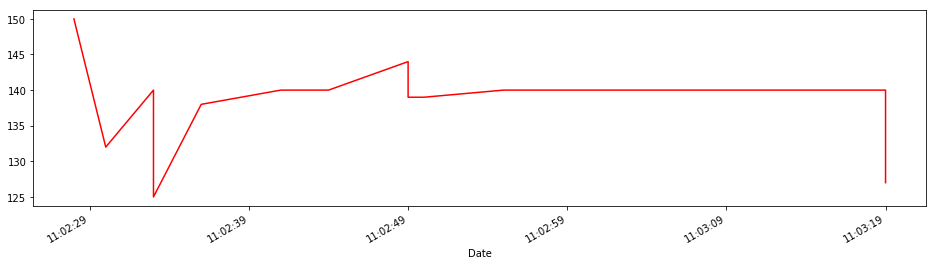

In [87]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

### 2.11 Nun plotten wir noch Likes vs Retweets

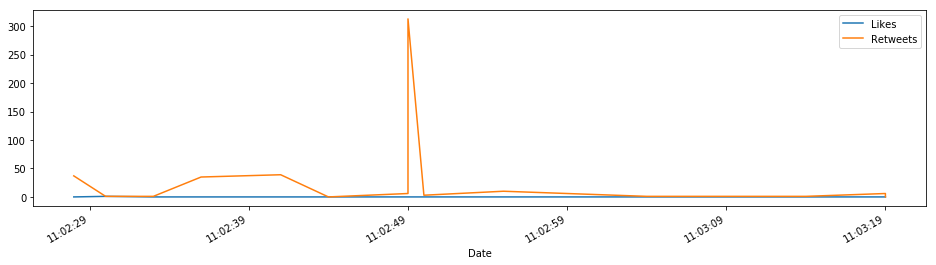

In [88]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### 2.12 Über welches Tools wurde getwittert? 

In [89]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* IFTTT
* Twitter for iPhone
* @Souvir
* buana_franke
* twitter-botJoonErdogan
* Twitter Web Client
* Data_Science_App_2


### 2.13 Nach der ersten Analyse des Datensatzes, kennen wir nun dessen Aufbau. <br>Nun wird es Zeit für die eigentliche Sentimentanalyse
Zuerst müssen die Tweets gecleaned werden.<br>Das bedeutet wir entfernen folgende Sonderzeichen:"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " "<br> Hierbei hilft uns das Pyackage **re**.

In [90]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

### 2.14 Nachdem wir die Tweets gecleaned haben, können wir die den TextBlob Classifier verwenden

In [92]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

### 2.15 Die Ergebnisse sollen in einer zusätzlichen Spalte z.B. "Sentiment" im Dataframe dargestellt werden

In [93]:
# We create a column with the result of the analysis:
data['Sentimentanalysis'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Sentimentanalysis
0,RT @anthonyawasom: The #DataScience #ecosystem...,140,1003593033630167040,2018-06-04 11:03:19,Twitter for Android,0,6,0
1,"RT Talent_metrics ""RT Rbloggers: Interactive R...",127,1003593031340175360,2018-06-04 11:03:19,IFTTT,0,0,0
2,RT @ams_ds: Seen our 28 JUNE program? #DataSci...,140,1003593010775494656,2018-06-04 11:03:14,Twitter for iPhone,0,1,0
3,RT @HakunaMaDatacom: The Mobile #Growth #Stati...,140,1003592969050558465,2018-06-04 11:03:04,@Souvir,0,1,0
4,RT @IainLJBrown: India's Largest Data Science ...,140,1003592932572651520,2018-06-04 11:02:55,buana_franke,0,10,1
5,RT @MangoTheCat: NEW ON THE BLOG: Our Chief Da...,139,1003592913027260416,2018-06-04 11:02:50,Twitter for iPhone,0,3,1
6,RT @IainLJBrown: 2018 Data Governance &amp; In...,144,1003592905771008000,2018-06-04 11:02:49,twitter-botJoonErdogan,0,6,0
7,RT @DeepLearn007: MIT: Revolutionizing Everyda...,139,1003592904881922050,2018-06-04 11:02:49,Twitter for iPhone,0,313,-1
8,@FIFAWorldCup prize pool will be $790 million:...,140,1003592886397566976,2018-06-04 11:02:44,Twitter Web Client,0,0,0
9,RT @jblefevre60: The #CIO's Guide to #QuantumC...,140,1003592873156046848,2018-06-04 11:02:41,Twitter Web Client,0,39,0


### 2.16 Um eine Übersicht über das Ergebnis zu erhalten, wollen wir uns die Sentimente nun in Prozentangaben ausgeben lassen

In [94]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentimentanalysis'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentimentanalysis'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentimentanalysis'][index] < 0]

In [68]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 13.333333333333334%
Percentage of neutral tweets: 60.0%
Percentage de negative tweets: 26.666666666666668%
